# Introduction to Exploratory Data Analysis
Using Pandas!

This notebook goes along with a tutorial that can be found on the [Medallion Data Science youtube channel](https://www.youtube.com/channel/UCxladMszXan-jfgzyeIMyvw). Click the link and subscribe for future tutorials.

# Step 0: Import libraries and Reading Data

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
# pd.set_option('display.max_columns', 200)
pd.set_option('display.max_columns', None)  # Show all columns

In [290]:
df = pd.read_csv(r'/Users/omkargopalakrishnan/Downloads/DA-Course/Data Immersion/Exercises-OG/6/6.1/02 Data/Original Data/boat_data.csv', index_col = False)

## Step 1: Data Understanding
- Dataframe `shape`
- `head` and `tail`
- `dtypes`
- `describe`


In [292]:
# Return a tuple representing the dimensionality of the DataFrame
df.shape

(9888, 10)

In [293]:
# Return the first 5 rows
df.head(5)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


In [294]:
# Fetch the column labels
df.columns

Index(['Price', 'Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length',
       'Width', 'Material', 'Location', 'Number of views last 7 days'],
      dtype='object')

In [295]:
# Return the dtypes in the DataFrame
df.dtypes

Price                           object
Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Location                        object
Number of views last 7 days      int64
dtype: object

In [296]:
# Generate descriptive statistics
df.describe()

,Year Built,Length,Width,Number of views last 7 days
count,9888.000000,9879.000000,9832.000000,9888.000000
mean,1893.192860,11.570017,3.520124,149.160801
std,460.201582,6.002820,1.220534,151.819752
min,0.000000,1.040000,0.010000,13.000000
25%,1996.000000,7.470000,2.540000,70.000000
50%,2007.000000,10.280000,3.330000,108.000000
75%,2017.000000,13.930000,4.250000,172.000000
max,2021.000000,100.000000,25.160000,3263.000000


# Step 2: Data Cleaning and Preparation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

In [298]:
# Create a copy of the DataFrame
df = df.copy()

In [299]:
# Fetch the column labels
df.columns

Index(['Price', 'Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length',
       'Width', 'Material', 'Location', 'Number of views last 7 days'],
      dtype='object')

In [300]:
# Rename column names
df = df.rename(columns={'Boat Type':'Boat_Type', 'Year Built':'Year_Built', 'Number of views last 7 days':'Views_last_7_days'})

In [301]:
# Remove leading/trailing spaces
df.columns = df.columns.str.strip()

In [302]:
# Convert object columns to category
for col in ['Price', 'Boat_Type', 'Manufacturer', 'Type', 'Material', 'Location']:
    df[col] = df[col].astype('category')

In [303]:
# Downcast numeric columns to save space
df['Year_Built'] = pd.to_numeric(df['Year_Built'], downcast='integer')
df['Views_last_7_days'] = pd.to_numeric(df['Views_last_7_days'], downcast='integer')
df['Length'] = pd.to_numeric(df['Length'], downcast='float')
df['Width'] = pd.to_numeric(df['Width'], downcast='float')

In [304]:
# Check dtypes of the downcast numeric columns
df.dtypes

Price                category
Boat_Type            category
Manufacturer         category
Type                 category
Year_Built              int16
Length                float32
Width                 float32
Material             category
Location             category
Views_last_7_days       int16
dtype: object

In [305]:
# Check for missing values in the DataFrame
df.isna().sum()

Price                   0
Boat_Type               0
Manufacturer         1338
Type                    6
Year_Built              0
Length                  9
Width                  56
Material             1749
Location               36
Views_last_7_days       0
dtype: int64

In [306]:
# Check for duplicate rows
df.loc[df.duplicated()]

,Price,Boat_Type,Manufacturer,Type,Year_Built,Length,Width,Material,Location,Views_last_7_days


In [307]:
# Check for duplicates in the column Manufacturer
df.loc[df.duplicated(subset=['Manufacturer'])].head(5)

,Price,Boat_Type,Manufacturer,Type,Year_Built,Length,Width,Material,Location,Views_last_7_days
5,CHF 3650,Sport Boat,Linder power boats,new boat from stock,0,4.03,1.56,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,132
7,DKK 24800,Sport Boat,NaN,Used boat,0,3.00,NaN,NaN,Denmark Â» Svendborg,134
10,CHF 3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland Â» Seengen,239
11,CHF 3480,Fishing Boat,Marine power boats,new boat from stock,0,4.13,1.41,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa am ZÃ¼...,145
16,CHF 4380,Sport Boat,Linder power boats,new boat from stock,0,4.31,1.64,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,462


In [308]:
# Checking an example duplicate
df.query('Manufacturer == "Abacus power boats"')

,Price,Boat_Type,Manufacturer,Type,Year_Built,Length,Width,Material,Location,Views_last_7_days
3017,DKK 4600000,Motor Yacht,Abacus power boats,Used boat,2010,18.660000,5.00,GRP,Italy,55
3817,EUR 750000,Flybridge,Abacus power boats,"Used boat,Diesel",2011,21.469999,5.43,NaN,Italy Â» Mare Adriatico,144
4179,EUR 450000,Flybridge,Abacus power boats,"Used boat,Diesel",2007,18.660000,5.00,NaN,Italy Â» Toscana Â» Toscana,46
5203,EUR 210000,Flybridge,Abacus power boats,"Used boat,Diesel",2011,16.180000,4.75,GRP,Italy Â» Lazio Â» Terracina,101


In [309]:
# Convert the data type of column Price from category to string
df['Price'] = df['Price'].astype(str)

In [310]:
# Use str.extract to split the column "Price" into columns "Currency" and "Amount"
df[['Currency', 'Amount']] = df['Price'].str.extract(r'(\D+)\s+(\d+.*)')

In [311]:
df['Currency'] = df['Currency'].astype('string')

In [312]:
# Convert Amount to numeric type (removing commas if necessary)
df['Amount'] = df['Amount'].str.replace(',', '').astype(int)

In [313]:
# Delete the Price column
df.drop('Price', axis=1, inplace=True)

In [314]:
# Replace all occurrences of Â£ with GBP in the Currency column
df['Currency'] = df['Currency'].replace('Â£', 'GBP')

In [315]:
# Dictionary of exchange rates relative to EUR
exchange_rates = {
    "EUR": 1,      # 1 EUR = 1 EUR
    "DKK": 0.13,   # 1 DKK = 0.13 EUR
    "GBP": 1.20,   # 1 GBP = 1.20 EUR
    "CHF": 0.99    # 1 CHF = 0.99 EUR
}

In [316]:
# Remove leading/trailing spaces from column "Currency"
df['Currency'] = df['Currency'].str.strip()  

In [317]:
# Add a new column "Price_in_EUR" with the prices converted to EUR using .get() for safe lookup
df["Price_in_EUR"] = df.apply(
    lambda row: row["Amount"] * exchange_rates.get(row["Currency"], float("nan")),
    axis=1
)

In [318]:
df.head(5)

,Boat_Type,Manufacturer,Type,Year_Built,Length,Width,Material,Location,Views_last_7_days,Currency,Amount,Price_in_EUR
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3337,3303.63
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490,3490.00
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3770,3732.30
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK,25900,3367.00
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399,3399.00


In [319]:
# Get unique values in the column "Currency"
unique_currencies = df['Currency'].unique()

# Display the unique currencies
print("Unique currencies:", unique_currencies)

Unique currencies: <StringArray>
['CHF', 'EUR', 'DKK', 'GBP']
Length: 4, dtype: string


In [320]:
# Split the strings in the column 'Location' to separete columns at the delimiter ' Â» '.
print(df['Location'].str.split(' Â» ', expand=True))

                0                    1          2
0     Switzerland          Lake Geneva   VÃ©senaz
1         Germany        BÃ¶nningstedt       None
2     Switzerland       Lake of Zurich  StÃ¤fa ZH
3         Denmark            Svendborg       None
4         Germany               Bayern   MÃ¼nchen
...           ...                  ...        ...
9883  Switzerland        Lago Maggiore   Riazzino
9884      Germany              Hamburg    HAMBURG
9885      Germany  Nordrhein-Westfalen      Wesel
9886        Italy         Dormelletto        None
9887  Switzerland          Brienzersee     Brienz

[9888 rows x 3 columns]


In [321]:
# Splitting the string to the columns 'Country', 'Place_1', and 'Place_2'.
df[['Country', 'Place_1', 'Place_2']] = df['Location'].str.split(' Â» ', expand=True)

In [322]:
df.head(5)

,Boat_Type,Manufacturer,Type,Year_Built,Length,Width,Material,Location,Views_last_7_days,Currency,Amount,Price_in_EUR,Country,Place_1,Place_2
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3337,3303.63,Switzerland,Lake Geneva,VÃ©senaz
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490,3490.00,Germany,BÃ¶nningstedt,None
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3770,3732.30,Switzerland,Lake of Zurich,StÃ¤fa ZH
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK,25900,3367.00,Denmark,Svendborg,None
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399,3399.00,Germany,Bayern,MÃ¼nchen


In [323]:
# Delete the column 'Location'
df.drop('Location', axis=1, inplace=True)

In [324]:
# Fix encoding issues in all relevant columns
for col in ['Country', 'Place_1', 'Place_2']:
    df[col] = df[col].apply(lambda x: x.encode('latin-1').decode('utf-8') if isinstance(x, str) else x)

In [325]:
# Display the updated DataFrame
df.head(5)

,Boat_Type,Manufacturer,Type,Year_Built,Length,Width,Material,Views_last_7_days,Currency,Amount,Price_in_EUR,Country,Place_1,Place_2
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,226,CHF,3337,3303.63,Switzerland,Lake Geneva,Vésenaz
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,EUR,3490,3490.00,Germany,Bönningstedt,None
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124,CHF,3770,3732.30,Switzerland,Lake of Zurich,Stäfa ZH
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,64,DKK,25900,3367.00,Denmark,Svendborg,None
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,EUR,3399,3399.00,Germany,Bayern,München


In [326]:
print(df.dtypes)

Boat_Type                  category
Manufacturer               category
Type                       category
Year_Built                    int16
Length                      float32
Width                       float32
Material                   category
Views_last_7_days             int16
Currency             string[python]
Amount                        int64
Price_in_EUR                float64
Country                      object
Place_1                      object
Place_2                      object
dtype: object


In [327]:
# Forcefully convert Country, Place_1, and Place_2 to type string
df[['Country', 'Place_1', 'Place_2']] = df[['Country', 'Place_1', 'Place_2']].astype('string')

In [328]:
print(df.dtypes)

Boat_Type                  category
Manufacturer               category
Type                       category
Year_Built                    int16
Length                      float32
Width                       float32
Material                   category
Views_last_7_days             int16
Currency             string[python]
Amount                        int64
Price_in_EUR                float64
Country              string[python]
Place_1              string[python]
Place_2              string[python]
dtype: object


In [329]:
df['Year_Built'].value_counts()

Year_Built
2020    1279
2019     663
0        551
2008     457
2007     393
        ... 
1914       1
1895       1
1885       1
1931       1
1900       1
Name: count, Length: 122, dtype: int64

In [330]:
# filtered_df = df[(df['Year_Built'] >= 0) & (df['Year_Built'] <= 1973)]

In [331]:
# print(filtered_df)

# Step 3: Feature Understanding
(Univariate analysis)

- Plotting Feature Distributions
    - Histogram
    - KDE
    - Boxplot

Text(0, 0.5, 'Count')

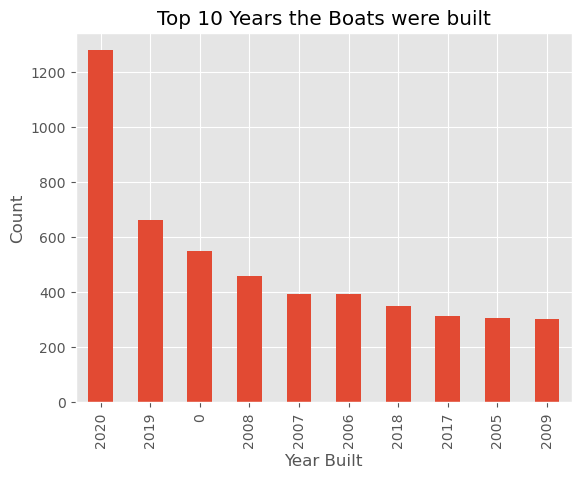

In [333]:
ax = df['Year_Built'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Years the Boats were built')
ax.set_xlabel('Year Built')
ax.set_ylabel('Count')

In [334]:
# Remove rows where 'Year_Built' is 0
df = df[df['Year_Built'] != 0].reset_index(drop=True)

In [335]:
# Filter out boats above 60 m in length
filtered_df_length = df[(df['Length'] >= 60) & (df['Length'] <= 100)]

In [336]:
# Delete the boats above 60 m in length
df = df.drop(filtered_df_length.index).reset_index(drop=True)

Text(0, 0.5, 'Count')

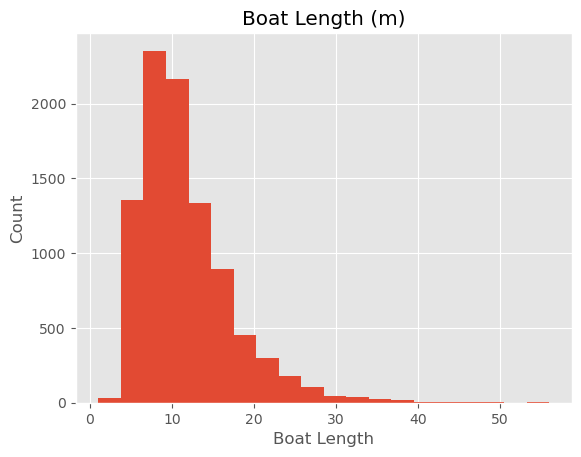

In [337]:
ax = df['Length'].plot(kind='hist',
                          bins=20,
                          title='Boat Length (m)')
ax.set_xlabel('Boat Length')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

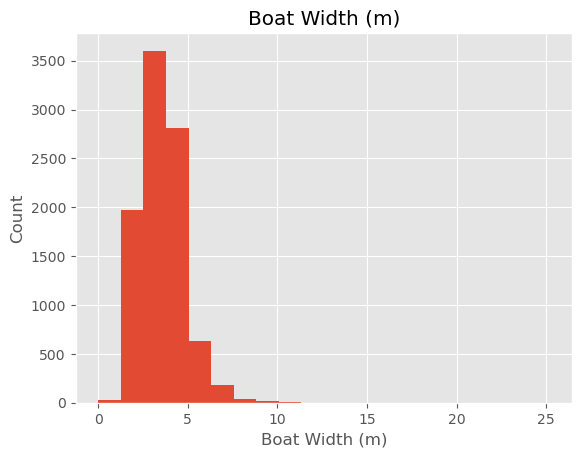

In [338]:
ax = df['Width'].plot(kind='hist',
                          bins=20,
                          title='Boat Width (m)')
ax.set_xlabel('Boat Width (m)')
ax.set_ylabel('Count')

In [339]:
# Filter out boats above 15 m in width
filtered_df_width = df[(df['Width'] > 15)]

In [340]:
# Delete the boats above 15 m in width
df = df.drop(filtered_df_width.index).reset_index(drop=True)

Text(0, 0.5, 'Count')

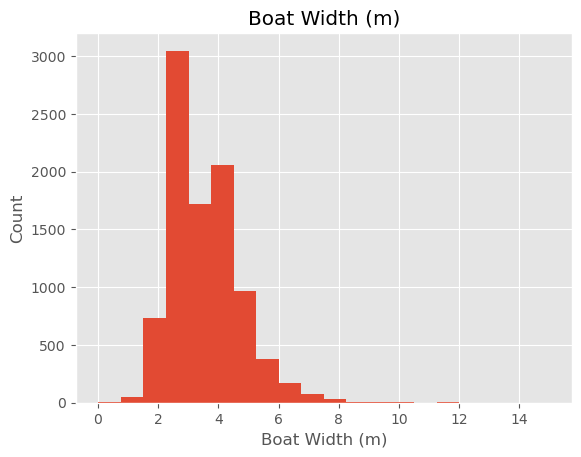

In [341]:
ax = df['Width'].plot(kind='hist',
                          bins=20,
                          title='Boat Width (m)')
ax.set_xlabel('Boat Width (m)')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

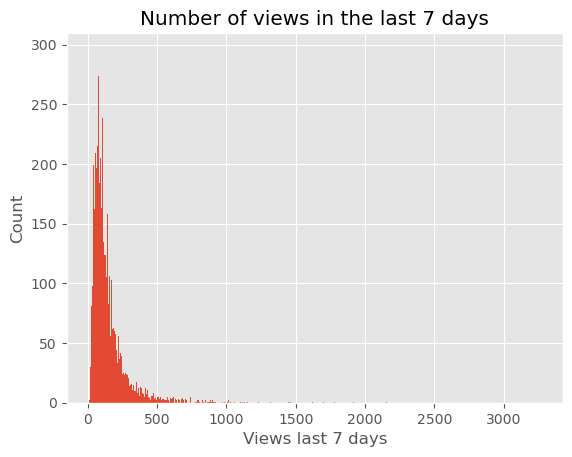

In [342]:
ax = df['Views_last_7_days'].plot(kind='hist',
                          bins=1000,
                          title='Number of views in the last 7 days')
ax.set_xlabel('Views last 7 days')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

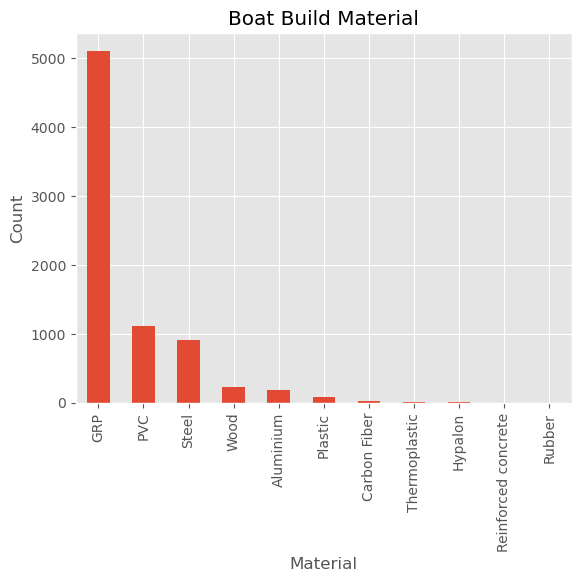

In [343]:
ax = df['Material'].value_counts().plot(kind='bar', title='Boat Build Material')
ax.set_xlabel('Material')
ax.set_ylabel('Count')

In [344]:
df['Material'].value_counts()

Material
GRP                    5111
PVC                    1115
Steel                   906
Wood                    229
Aluminium               184
Plastic                  75
Carbon Fiber             29
Thermoplastic            13
Hypalon                   5
Reinforced concrete       1
Rubber                    1
Name: count, dtype: int64

# Step 4: Feature Relationships
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby comparisons

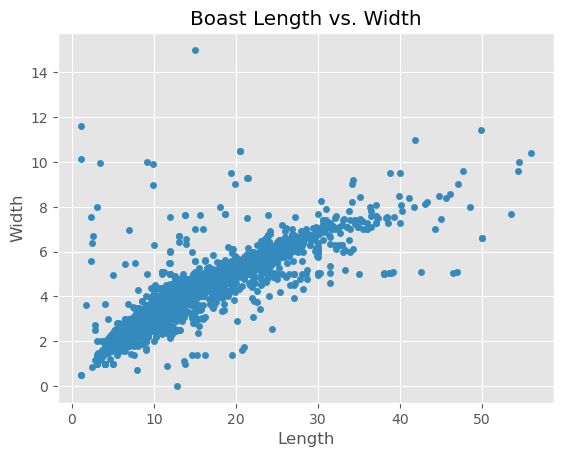

In [346]:
df.plot(kind='scatter',
        x='Length',
        y='Width',
        title='Boast Length vs. Width')
plt.show()

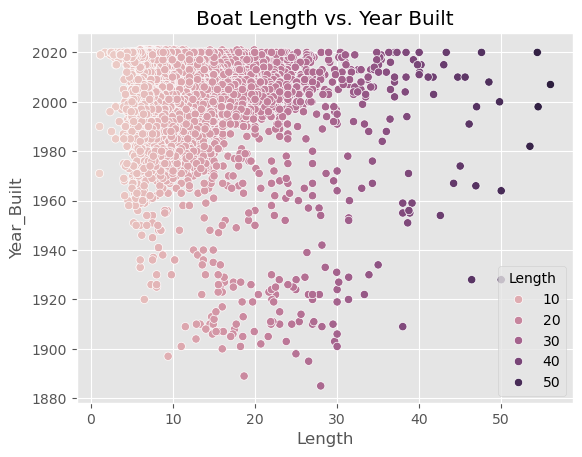

In [347]:
ax = sns.scatterplot(x='Length',
                y='Year_Built',
                hue='Length',
                data=df)
ax.set_title('Boat Length vs. Year Built')
plt.show()

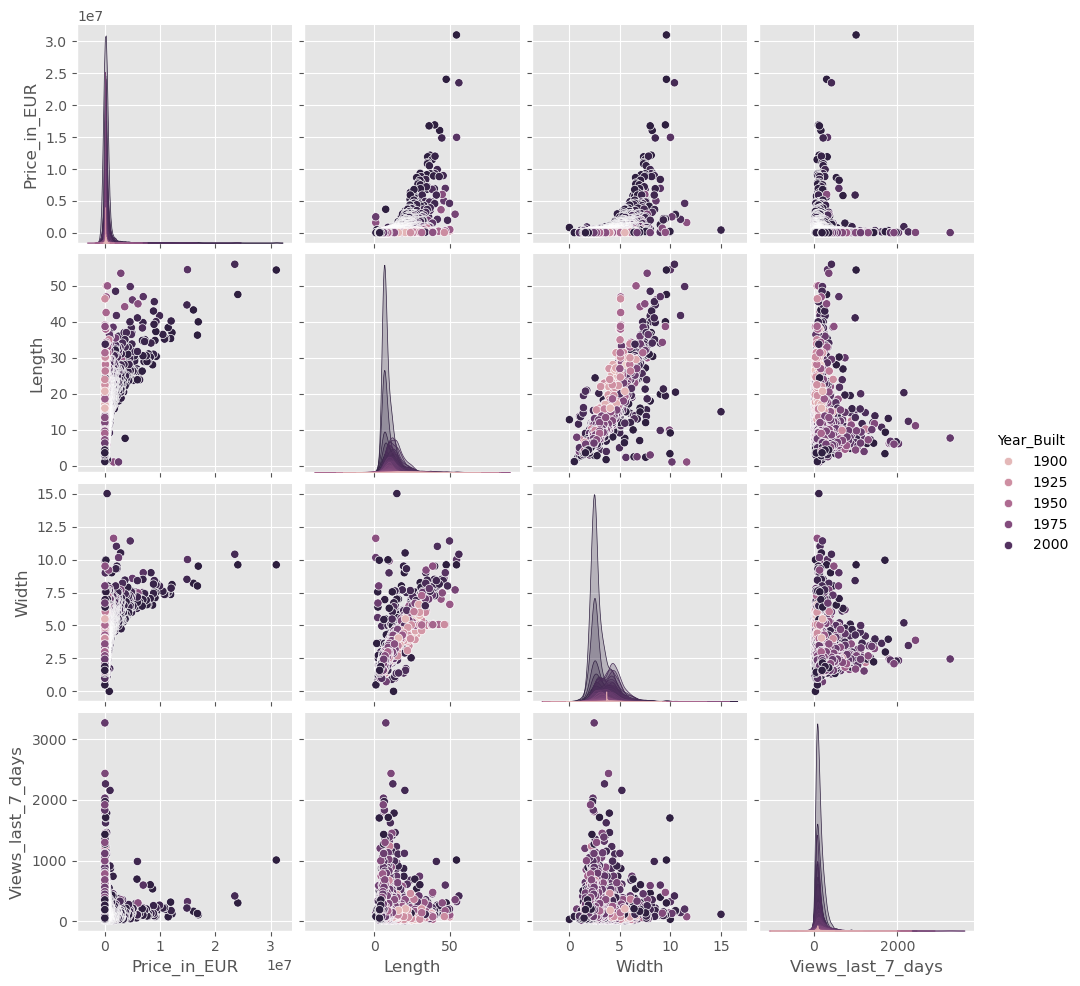

In [366]:
sns.pairplot(df,
             vars =['Price_in_EUR', 'Length',
                   'Width','Views_last_7_days'],
            hue = 'Year_Built')
plt.show()

In [349]:
df_corr = df[['Year_Built','Length',
    'Width','Views_last_7_days']].dropna().corr()
df_corr

,Year_Built,Length,Width,Views_last_7_days
Year_Built,1.000000,-0.189069,-0.100199,-0.113545
Length,-0.189069,1.000000,0.899765,-0.148558
Width,-0.100199,0.899765,1.000000,-0.169619
Views_last_7_days,-0.113545,-0.148558,-0.169619,1.000000


<Axes: >

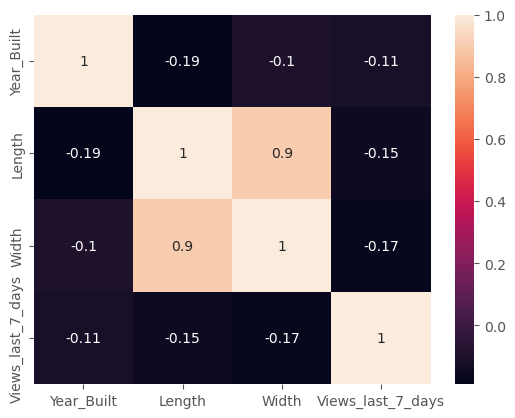

In [350]:
sns.heatmap(df_corr, annot=True)

# Step 5: Ask a Question about the data
- Try to answer a question you have about the data using a plot or statistic.

What are the locations with the fastest roller coasters (minimum of 10)?

In [352]:
ax = df.query('Location != "Other"') \
    .groupby('Location')['Speed_mph'] \
    .agg(['mean','count']) \
    .query('count >= 10') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(12, 5), title='Average Coast Speed by Location')
ax.set_xlabel('Average Coaster Speed')
plt.show()

UndefinedVariableError: name 'Location' is not defined